In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# raw_data = pd.read_excel('ex.xlsx',header=0)
# raw_data = pd.read_excel('ex_api.xlsx',header=0)
raw_data = pd.read_excel('exchange_only.xlsx',header=0)

# raw_data = pd.read_csv('ex.csv',header=0)

In [5]:
raw_data = raw_data[raw_data['volume'] > 1]
# Dollar volume to coin volume
# raw_data['log_vol'] = np.log(raw_data['volume']/raw_data['Price'])
raw_data['log_vol'] = np.log(raw_data['volume'])
raw_data['log_prc'] = np.log(raw_data['Price'])

raw_data = raw_data[raw_data['log_vol'] > 1]

In [6]:
raw_data.head()

,Coin,ExCUR,volume,Price,CurRatio,exchage,NumCoin,BaseCUR,Location,Takerfee,...,api_rest_code,api_socket,api_socket_code,api_soap,other_api,library_support,api_rest_testable,api_socket_testable,log_vol,log_prc
0,Bitcoin,BTC/USD,2241660000,11920.00,1.0000,BitMEX,1,USD,USA,0.00075,...,1,1,1,0,1,1,1,0,21.530482,9.385973
1,Bitcoin,BTC/USD,626886000,10916.00,0.4832,Bitfinex,64,USD,Hongkong,0.00200,...,1,1,0,0,0,1,1,1,20.256275,9.297985
2,Ethereum,ETH/USD,102157000,457.00,0.0787,Bitfinex,64,USD,Hongkong,0.00200,...,1,1,0,0,0,1,1,1,18.442021,6.124683
3,IOTA,MIOTA/USD,68914500,1.40,0.0531,Bitfinex,64,USD,Hongkong,0.00200,...,1,1,0,0,0,1,1,1,18.048377,0.336472
4,Litecoin,LTC/USD,63171500,99.32,0.0487,Bitfinex,64,USD,Hongkong,0.00200,...,1,1,0,0,0,1,1,1,17.961364,4.598347


In [7]:
raw_data['MinTrade'].fillna(value=0.0001, inplace=True)
raw_data['leverage'].fillna(value=1, inplace=True)

In [8]:
raw_data.describe()

C:\Users\Rocku\Anaconda64\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,volume,Price,CurRatio,NumCoin,Takerfee,Makerfee,WithdrawBTC,leverage,MinTrade,TmM,...,api_rest_code,api_socket,api_socket_code,api_soap,other_api,library_support,api_rest_testable,api_socket_testable,log_vol,log_prc
count,5.320000e+02,5.320000e+02,532.000000,532.000000,532.000000,532.000000,210.000000,532.000000,5.320000e+02,532.000000,...,532.000000,532.000000,532.000000,532.0,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,1.521392e+07,1.648037e+03,0.063057,160.221805,0.001997,0.001347,0.000734,2.122538,5.286157e-03,0.000651,...,0.669173,0.342105,0.221805,0.0,0.056391,0.270677,0.075188,0.048872,11.772393,2.450175
std,1.095859e+08,3.823482e+03,0.176036,153.023735,0.001317,0.001213,0.000554,5.365195,1.614818e-02,0.001026,...,0.470954,0.474861,0.415851,0.0,0.230892,0.444728,0.263943,0.215804,4.053864,4.712528
min,3.000000e+00,9.100000e-07,0.000000,1.000000,-0.000100,-0.000500,0.000000,1.000000,1.000000e-08,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.098612,-13.909821
25%,1.128025e+04,3.055168e-01,0.000200,21.000000,0.001000,0.000150,NaN,1.000000,1.000000e-04,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,9.330808,-1.185806
50%,1.402415e+05,1.353500e+01,0.002900,118.000000,0.002000,0.001500,NaN,1.000000,1.000000e-04,0.000000,...,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,11.851080,2.605276
75%,3.228560e+06,4.660800e+02,0.028500,287.000000,0.002500,0.002000,NaN,1.000000,1.000000e-02,0.001000,...,1.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,14.987521,6.144357
max,2.241660e+09,2.400000e+04,1.000000,563.000000,0.010000,0.008700,0.005000,100.000000,1.000000e-01,0.010000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,21.530482,10.085809


In [9]:
grouped_co = raw_data.groupby(by='Coin')

In [10]:
count = grouped_co['NumCoin'].count()
count.order(ascending=False,inplace=True)
count

C:\Users\Rocku\Anaconda64\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


Coin
Bitcoin                 66
Ethereum                37
Bitcoin Cash            30
Litecoin                28
Dash                    19
Ethereum Classic        15
Ripple                  14
Zcash                   13
Monero                  10
Bitcoin Gold             9
Qtum                     8
NEO                      7
EOS                      6
OmiseGO                  5
Civic                    4
QASH                     4
Waves                    4
Dogecoin                 4
Hshare                   4
TRON                     4
Tether                   3
NEM                      3
Centra                   3
Lisk                     3
Kyber Network            3
Storj                    3
Stox                     3
0x                       3
Tierion                  3
VeChain                  3
                        ..
LEOcoin                  1
KickCoin                 1
Karbowanec               1
Ink                      1
Indorse Token            1
Iconomi                

In [11]:
dataframe = count.reset_index()
dataframe

,Coin,NumCoin
0,Bitcoin,66
1,Ethereum,37
2,Bitcoin Cash,30
3,Litecoin,28
4,Dash,19
5,Ethereum Classic,15
6,Ripple,14
7,Zcash,13
8,Monero,10
9,Bitcoin Gold,9


In [12]:
merged = pd.merge(raw_data,dataframe,how='left',on='Coin')

In [13]:
raw_data['BigCoin'] = np.where(merged['NumCoin_y'] > 5, 1,0)

In [14]:
summed = grouped_co['volume'].sum()
summed.order(ascending=False,inplace=True)
print(summed)

Coin
Bitcoin                    5925031792
Ethereum Classic            504812437
Ethereum                    460066804
Litecoin                    286467678
Bitcoin Cash                284448835
Ripple                       80710970
EOS                          74043505
IOTA                         73338530
Dash                         72718730
Bitcoin Gold                 60204044
Tether                       38693714
Qtum                         34760494
Monero                       26952514
Zcash                        25402298
MonaCoin                     19524140
Santiment Network Token      18007768
NEO                          17283812
Hshare                       15201888
OmiseGO                      14160970
Stellar Lumens                9708620
Nxt                           8204336
QASH                          6005544
NEM                           4918707
Metaverse ETP                 3638316
YOYOW                         3269210
Streamr DATAcoin              2926644
BitShar

C:\Users\Rocku\Anaconda64\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


In [15]:
grouped_ex = raw_data.groupby(by='exchage')

In [16]:
count = grouped_ex['NumCoin'].count()
count.order(ascending=False,inplace=True)
count.reset_index()

C:\Users\Rocku\Anaconda64\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


,exchage,NumCoin
0,Livecoin,66
1,HitBTC,64
2,Liqui,58
3,Gate.io,51
4,YoBit,29
5,Bitfinex,26
6,Exmo,16
7,WEX,14
8,Coinnest,13
9,Bittrex,12


In [17]:
meaned = grouped_ex['CurRatio'].sum()
meaned.order(ascending=False,inplace=True)
meaned

C:\Users\Rocku\Anaconda64\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


exchage
Bithumb              1.0001
LakeBTC              1.0001
itBit                1.0000
Paribu               1.0000
BTCBOX               1.0000
BitMEX               1.0000
Coincheck            1.0000
Foxbit               1.0000
OkCoin Intl.         1.0000
ACX                  1.0000
Coinone              0.9999
Mercado Bitcoin      0.9999
Luno                 0.9999
Coinnest             0.9999
CoinsBank            0.9997
Coinfloor            0.9988
Fisco                0.9972
Korbit               0.9948
Zaif                 0.9920
bitFlyer             0.9890
Gemini               0.9739
BTC Markets          0.9733
CEX.IO               0.9621
ZB.COM               0.9605
BTCC                 0.9258
Bitfinex             0.8675
GDAX                 0.8625
Bitcoin Indonesia    0.7892
Huobi                0.7515
Bitstamp             0.7370
GetBTC               0.6714
WEX                  0.6166
Exmo                 0.5566
Quoine               0.4795
Poloniex             0.4427
Gate.io     

In [18]:
raw_data.columns

Index(['Coin', 'ExCUR', 'volume', 'Price', 'CurRatio', 'exchage', 'NumCoin',
       'BaseCUR', 'Location', 'Takerfee', 'Makerfee', 'DeopsitCUR',
       'DepositBTC', 'WithdrawCUR', 'WithdrawBTC', 'leverage', 'MinTrade',
       'TmM', 'api_rest', 'api_rest_code', 'api_socket', 'api_socket_code',
       'api_soap', 'other_api', 'library_support', 'api_rest_testable',
       'api_socket_testable', 'log_vol', 'log_prc', 'BigCoin'],
      dtype='object')

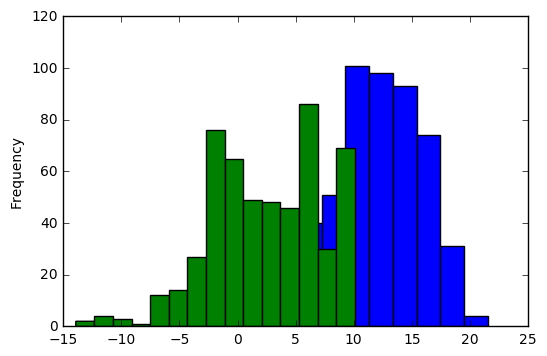

In [19]:
raw_data['log_vol'].plot.hist()
raw_data['log_prc'].plot.hist(bins=15)

In [20]:
import statsmodels.graphics.api as smg

cor_data = raw_data[['CurRatio', 'NumCoin','Takerfee', 'Makerfee', 'leverage', 'MinTrade', 'log_prc','log_vol']]
cor_data = cor_data.astype(float)
corr_table = cor_data.corr('pearson')
corr_table

,CurRatio,NumCoin,Takerfee,Makerfee,leverage,MinTrade,log_prc,log_vol
CurRatio,1.000000,-0.321815,0.081572,-0.008234,0.260376,-0.035857,0.420391,0.457157
NumCoin,-0.321815,1.000000,-0.167120,-0.044610,-0.182307,-0.115120,-0.505261,-0.567645
Takerfee,0.081572,-0.167120,1.000000,0.674328,-0.167489,-0.083819,0.138774,0.038630
Makerfee,-0.008234,-0.044610,0.674328,1.000000,-0.167204,-0.133773,0.044781,-0.084653
leverage,0.260376,-0.182307,-0.167489,-0.167204,1.000000,0.073019,0.146359,0.219975
MinTrade,-0.035857,-0.115120,-0.083819,-0.133773,0.073019,1.000000,0.068374,0.143371
log_prc,0.420391,-0.505261,0.138774,0.044781,0.146359,0.068374,1.000000,0.604053
log_vol,0.457157,-0.567645,0.038630,-0.084653,0.219975,0.143371,0.604053,1.000000


In [21]:
raw_data.columns

Index(['Coin', 'ExCUR', 'volume', 'Price', 'CurRatio', 'exchage', 'NumCoin',
       'BaseCUR', 'Location', 'Takerfee', 'Makerfee', 'DeopsitCUR',
       'DepositBTC', 'WithdrawCUR', 'WithdrawBTC', 'leverage', 'MinTrade',
       'TmM', 'api_rest', 'api_rest_code', 'api_socket', 'api_socket_code',
       'api_soap', 'other_api', 'library_support', 'api_rest_testable',
       'api_socket_testable', 'log_vol', 'log_prc', 'BigCoin'],
      dtype='object')

In [22]:
import statsmodels.graphics.api as smg

cor_data = raw_data[['CurRatio', 'NumCoin','Takerfee', 'Makerfee', 'leverage', 'MinTrade', 
                     'log_prc','log_vol','api_rest', 'api_rest_code', 'api_socket', 'api_socket_code',
                     'other_api', 'library_support', 'api_rest_testable', 'api_socket_testable']]
cor_data = cor_data.astype(float)
corr_table = cor_data.corr('pearson')
corr_table

,CurRatio,NumCoin,Takerfee,Makerfee,leverage,MinTrade,log_prc,log_vol,api_rest,api_rest_code,api_socket,api_socket_code,other_api,library_support,api_rest_testable,api_socket_testable
CurRatio,1.000000,-0.321815,0.081572,-0.008234,0.260376,-0.035857,0.420391,0.457157,-0.231192,-0.012122,0.144055,0.084198,0.246544,0.047190,0.094606,-0.038269
NumCoin,-0.321815,1.000000,-0.167120,-0.044610,-0.182307,-0.115120,-0.505261,-0.567645,0.045197,-0.156267,-0.078071,0.121628,-0.228324,-0.281984,-0.217322,-0.142671
Takerfee,0.081572,-0.167120,1.000000,0.674328,-0.167489,-0.083819,0.138774,0.038630,-0.066031,-0.169303,-0.151276,-0.170936,0.002054,0.196525,-0.095539,0.000469
Makerfee,-0.008234,-0.044610,0.674328,1.000000,-0.167204,-0.133773,0.044781,-0.084653,-0.059196,0.060060,-0.357149,-0.261537,-0.125398,0.202535,-0.109502,-0.064844
leverage,0.260376,-0.182307,-0.167489,-0.167204,1.000000,0.073019,0.146359,0.219975,0.009088,0.065720,0.101186,0.036752,0.210285,0.088828,0.202006,0.049795
MinTrade,-0.035857,-0.115120,-0.083819,-0.133773,0.073019,1.000000,0.068374,0.143371,0.014219,0.113996,0.233962,0.253564,0.320803,-0.062728,0.021851,0.066233
log_prc,0.420391,-0.505261,0.138774,0.044781,0.146359,0.068374,1.000000,0.604053,-0.063711,-0.027937,0.088643,-0.011591,0.215339,0.090806,0.090550,0.031115
log_vol,0.457157,-0.567645,0.038630,-0.084653,0.219975,0.143371,0.604053,1.000000,-0.045782,-0.027915,0.249294,0.062211,0.218005,0.253464,0.282586,0.210411
api_rest,-0.231192,0.045197,-0.066031,-0.059196,0.009088,0.014219,-0.063711,-0.045782,1.000000,0.061719,0.031294,0.023168,0.010609,0.026437,0.012374,0.009837
api_rest_code,-0.012122,-0.156267,-0.169303,0.060060,0.065720,0.113996,-0.027937,-0.027915,0.061719,1.000000,0.060719,0.183063,-0.122534,0.077679,0.185333,0.159383


In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Column"] = cor_data.columns
vif["VIF Factor"] = [variance_inflation_factor(cor_data.values, i) for i in range(cor_data.shape[1])]
vif.round(1)

,Column,VIF Factor
0,CurRatio,1.7
1,NumCoin,4.3
2,Takerfee,7.4
3,Makerfee,5.4
4,leverage,1.4
5,MinTrade,1.4
6,log_prc,2.3
7,log_vol,21.7
8,api_rest,37.4
9,api_rest_code,4.9


In [24]:
raw_data['Takerfee'] = raw_data['Takerfee']*100
raw_data['Makerfee'] = raw_data['Makerfee']*100

In [25]:
raw_data['TpM'] = raw_data['Takerfee'] + raw_data['Makerfee']
raw_data['TmM'] = raw_data['Takerfee'] - raw_data['Makerfee']

In [29]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# model = smf.ols('log_vol ~ MinTrade + Takerfee + Makerfee + leverage + log_prc + NumCoin + C(BigCoin) + C(Location)', data=raw_data).fit()
# model = smf.ols('log_vol ~ MinTrade + Makerfee + leverage + log_prc + NumCoin + C(BigCoin) + C(Location)', data=raw_data).fit()
# model = smf.ols('log_vol ~ MinTrade + Takerfee + leverage + log_prc + NumCoin + C(BigCoin) + C(Location)', data=raw_data).fit()

# model = smf.ols('log_vol ~ MinTrade + leverage + TpM + log_prc + NumCoin + C(BigCoin) + C(Location)', data=raw_data).fit()
# model = smf.ols('log_vol ~ MinTrade + leverage + Takerfee + Makerfee + log_prc + NumCoin + C(BigCoin) + C(Location)', data=raw_data).fit(cov_type='HC1')
# model = smf.ols('log_vol ~ Takerfee + Makerfee', data=raw_data).fit()
eq = 'log_vol ~ MinTrade + Makerfee + Takerfee + leverage + log_prc + NumCoin + C(BigCoin) + C(Location)\
+ C(api_rest) + C(api_rest_code) + C(api_socket) + C(api_socket_code) + C(other_api) + C(library_support)\
+ C(api_rest_testable) + C(api_socket_testable)'
# eq = 'log_vol ~ MinTrade + leverage + log_prc + NumCoin + TpM + C(BigCoin) + C(Location)\
# + C(api_rest) + C(api_rest_code) + C(api_rest_testable)'

# eq = 'log_vol ~ MinTrade + leverage + log_prc + NumCoin + TpM + C(BigCoin) + C(Location)\
# + C(api_rest) + C(api_rest_code) + C(api_rest_testable)\
# + C(api_socket) + C(api_socket_code) + C(api_socket_testable)'

# eq = 'log_vol ~ MinTrade + leverage + log_prc + NumCoin + TpM + C(BigCoin) + C(Location)\
# + C(api_rest) + C(api_rest_code) + C(api_rest_testable)\
# + C(api_socket) + C(api_socket_code) + C(api_socket_testable)\
# + C(other_api) + C(library_support)'

model = smf.ols(eq, data=raw_data).fit()


model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_vol   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     42.19
Date:                Tue, 06 Feb 2018   Prob (F-statistic):          3.98e-115
Time:                        18:15:14   Log-Likelihood:                -1170.6
No. Observations:                 532   AIC:                             2401.
Df Residuals:                     502   BIC:                             2529.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                         5.5840      1.025      5.449      0.000       3.571       7.598
C(BigCoin)[T.1]                                   2.2817      0.329      6.937      0.000       1.635       2.928
C(Location)[T.Brazil]                             2.9095      1.906      1.527      0.127      -0.835       6.654
C(Location)[T.China]                              3.9302      1.337      2.938      0.003       1.302       6.558
C(Location)[T.Hongkong]                           0.7597      1.788      0.425      0.671      -2.754       4.273
C(Location)[T.Indonesia]                          4.5880      1.956      2.346      0.019       0.745       8.431
C(Location)[T.Japan]                              5.0313      1.707      2.947      0.003       1.677       8.386
C(Location)[T.Korea]                              5.9491      1.582      3.760      0.000       2.841       9.058
C(Location)[T.Luxembourg]                         3.9065      1.679      2.327      0.020       0.608       7.205
C(Location)[T.Poland]                            -2.3576      1.662     -1.419      0.157      -5.623       0.907
C(Location)[T.Russia]                            -0.6859      1.811     -0.379      0.705      -4.244       2.872
C(Location)[T.Singapore]                          3.8033      1.682      2.262      0.024       0.499       7.107
C(Location)[T.St. Vincent and the Grenadines]     4.4973      2.197      2.047      0.041       0.180       8.815
C(Location)[T.Turkey]                             4.8507      1.568      3.093      0.002       1.770       7.932
C(Location)[T.UK]                                 1.3736      1.490      0.922      0.357      -1.553       4.300
C(Location)[T.USA]                                3.9053      1.377      2.837      0.005       1.201       6.610
C(Location)[T.Ukraine]                            3.7204      1.775      2.096      0.037       0.233       7.207
C(api_rest)[T.1]                                  0.7333      1.293      0.567      0.571      -1.806       3.273
C(api_rest_code)[T.1]                            -0.3931      0.379     -1.038      0.300      -1.137       0.351
C(api_socket)[T.1]                                1.7725      0.570      3.111      0.002       0.653       2.892
C(api_socket_code)[T.1]                          -0.0432      0.869     -0.050      0.960      -1.751       1.665
C(other_api)[T.1]                                 0.1214      0.723      0.168      0.867      -1.300       1.543
C(library_support)[T.1]                          -0.3238      0.662     -0.489      0.625      -1.625       0.978
C(api_rest_testable)[T.1]                         1.8164      0.796      2.282      0.023       0.253       3.380
C(api

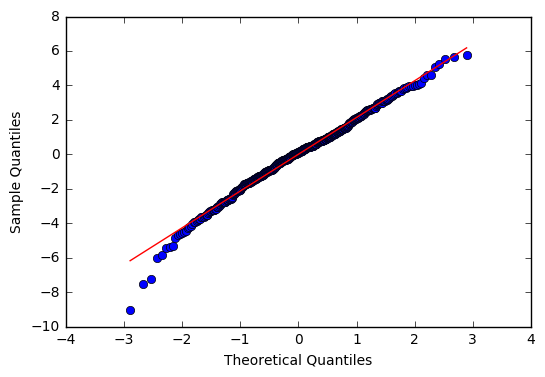

In [66]:
res = model.resid # residuals
fig = sm.qqplot(res,line='s')

In [67]:
coin_group = raw_data.groupby(by='BigCoin')

In [68]:
len(raw_data.loc[raw_data['BigCoin'] == 1,'Coin'])

256

In [69]:
coin_group.describe()

C:\Users\Rocku\Anaconda64\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


CurRatio    Makerfee      MinTrade     NumCoin         Price  \
BigCoin                                                                         
0       count  269.000000  269.000000  2.690000e+02  269.000000  2.690000e+02   
        mean     0.006246    0.120446  3.604467e-03  242.234201  1.084690e+01   
        std      0.033717    0.080305  9.466055e-03  147.571792  4.925853e+01   
        min      0.000000   -0.050000  1.000000e-08    3.000000  9.100000e-07   
        25%      0.000000    0.015000  1.000000e-04  118.000000  7.369900e-02   
        50%      0.000500    0.100000  1.000000e-04  196.000000  3.600100e-01   
        75%      0.002500    0.200000  1.000000e-02  351.000000  2.290000e+00   
        max      0.501300    0.300000  1.000000e-01  563.000000  5.811000e+02   
1       count  256.000000  256.000000  2.560000e+02  256.000000  2.560000e+02   
        mean     0.124462    0.148301  7.156383e-03   88.503906  3.089268e+03   
        std      0.236723    0.151852  2.101459e-02  128.455898  4.673641e+03   
        min      0.000000   -0.050000  1.000000e-08    1.000000  2.436550e-01   
        25%      0.005325    0.015000  1.000000e-04   11.000000  9.963500e+01   
        50%      0.021650    0.150000  5.000000e-04   32.000000  4.601850e+02   
        75%      0.091175    0.200000  6.250000e-03   99.000000  1.561962e+03   
        max      1.000000    0.870000  1.000000e-01  563.000000  1.281860e+04   

                 Takerfee         TmM         TpM  WithdrawBTC    api_rest  \
BigCoin                                                                      
0       count  269.000000  269.000000  269.000000    80.000000  269.000000   
        mean     0.179182    0.000587    0.299628     0.000791    1.000000   
        std      0.070859    0.000644    0.137066     0.000189    0.000000   
        min     -0.010000    0.000000   -0.060000     0.000000    1.000000   
        25%      0.100000    0.000000    0.200000          NaN    1.000000   
        50%      0.200000    0.000400    0.350000          NaN    1.000000   
        75%      0.200000    0.001000    0.400000          NaN    1.000000   
        max      0.430000    0.003000    0.730000     0.001000    1.000000   
1       count  256.000000  256.000000  256.000000   128.000000  256.000000   
        mean     0.219863    0.000716    0.368164     0.000699    0.996094   
        std      0.170861    0.001317    0.295218     0.000692    0.062500   
        min     -0.010000    0.000000   -0.060000     0.000000    0.000000   
        25%      0.150000    0.000000    0.200000          NaN    1.000000   
        50%      0.200000    0.000000    0.350000          NaN    1.000000   
        75%      0.250000    0.001000    0.400000          NaN    1.000000   
        max      1.000000    0.010000    1.740000     0.005000    1.000000   

                   ...       api_soap  api_socket  api_socket_code  \
BigCoin            ...                                               
0       count      ...          269.0  269.000000       269.000000   
        mean       ...            0.0    0.297398         0.211896   
        std        ...            0.0    0.457965         0.409413   
        min        ...            0.0    0.000000         0.000000   
        25%        ...            0.0    0.000000         0.000000   
        50%        ...            0.0    0.000000         0.000000   
        75%        ...            0.0    1.000000         0.000000   
        max        ...            0.0    1.000000         1.000000   
1       count      ...          256.0  256.000000       256.000000   
        mean       ...            0.0    0.390625         0.238281   
        std        ...            0.0    0.488846         0.426867   
        min        ...            0.0    0.000000         0.000000   
        25%        ...            0.0    0.000000         0.000000   
        50%        ...            0.0    0.000000         0.000000   
        75%        ...           

In [61]:
from scipy import stats
rvs1 = raw_data.loc[raw_data['BigCoin'] == 1,'leverage']
rvs2 = raw_data.loc[raw_data['BigCoin'] == 0,'leverage']

stats.ttest_ind(rvs1,rvs2)

Ttest_indResult(statistic=2.8175632593938982, pvalue=0.0050220108710192744)